In [1]:
import numpy as np
import pandas as pd
from scipy import io
from scipy.stats import linregress, describe
import matplotlib.pyplot as plt

In [2]:
subplots_data = io.loadmat('subplots.mat')
subplots = subplots_data['subplots']
np.shape(subplots)

(584, 60)

In [3]:
lai_data = io.loadmat('fieldlai.mat')
lai = lai_data['fieldlai'][0]

In [4]:
lai

array([2.54, 2.88, 2.13, 1.58, 1.94, 2.69, 3.6 , 5.11, 2.06, 5.09, 3.72,
       3.45, 3.3 , 2.76, 5.54, 6.16, 5.26, 4.47, 2.82, 1.63, 2.42, 2.33,
       2.84, 2.12, 1.65, 2.82, 1.64, 1.95, 2.46, 1.62, 2.02, 1.76, 1.31,
       2.25, 2.23, 4.94, 2.96, 3.33, 4.15, 4.13, 3.12, 2.76, 3.53, 3.09,
       5.43, 5.29, 4.39, 4.24, 2.74, 1.98, 3.05, 3.02, 1.96, 1.09, 1.43,
       2.2 , 1.4 , 1.08, 1.38, 1.36])

In [5]:
np.shape(subplots)

(584, 60)

In [6]:
subplots[0]

array([1.63317647, 1.38608824, 1.62261765, 1.79544118, 1.68752941,
       1.67151471, 1.47005882, 1.59147059, 1.82079412, 1.59147059,
       1.57344118, 1.50098529, 1.68394118, 1.57008824, 1.08202941,
       1.20861765, 1.25638235, 1.08070588, 1.57085294, 2.16738235,
       1.95238235, 1.81352941, 2.08175   , 1.90726471, 2.09808824,
       2.08175   , 2.33644118, 2.22614706, 2.57552941, 2.33644118,
       1.86614706, 2.0985    , 2.11570588, 1.97244118, 1.97244118,
       1.40517647, 1.28297059, 1.16147059, 1.22147059, 1.22147059,
       1.31923529, 1.57044118, 1.5285    , 1.31923529, 1.80142647,
       1.80820588, 2.04101471, 1.59355882, 1.36820588, 1.83016176,
       1.79188235, 1.79188235, 1.83016176, 2.00617647, 1.58475   ,
       1.91720588, 1.58475   , 2.21720588, 2.12017647, 1.88023529])

In [7]:
#NDVI=(infrared - red)/(infrared + red)
nir = subplots[298]
red = subplots[194]

NDVIs = (nir - red)/(nir + red)

In [8]:
NDVIs

array([0.80124622, 0.81770987, 0.76473776, 0.72382544, 0.64873222,
       0.75548466, 0.89082889, 0.89531476, 0.7884871 , 0.89531476,
       0.81173747, 0.80333766, 0.77236223, 0.80382923, 0.85751949,
       0.8580105 , 0.87559191, 0.86222756, 0.80474732, 0.57425708,
       0.66968322, 0.78267067, 0.75507011, 0.76554682, 0.68010971,
       0.75507011, 0.67566579, 0.71202606, 0.62519671, 0.67566579,
       0.67060712, 0.60581282, 0.64227121, 0.64010997, 0.64010997,
       0.86753392, 0.84236327, 0.85384694, 0.85905979, 0.85905979,
       0.78285882, 0.7369968 , 0.79290395, 0.78285882, 0.84722039,
       0.84686323, 0.74473159, 0.83565894, 0.853673  , 0.78758038,
       0.85288855, 0.85288855, 0.78758038, 0.75434658, 0.82933658,
       0.74444646, 0.82933658, 0.75425191, 0.75075183, 0.82470582])

In [9]:
coeff = linregress(NDVIs, lai) # calculate linear regression

In [10]:
NDVIs_r2 = coeff.rvalue**2 #square the r_value to get coefficient of determination
NDVIs_r2

0.4111413434942934

In [11]:
NDVIn = {'R2':[], 'band1':[], 'band2':[]}
for i,j in [(i, j) for i in enumerate(subplots) for j in enumerate(subplots)]:
    if i[0] != j[0]:
        NDVI = (i[1]-j[1])/(i[1]+j[1]) 
        coeff = linregress(NDVI, lai)
        coeff = coeff.rvalue**2
        NDVIn['R2'].append(coeff)
        NDVIn['band1'].append(i[0])
        NDVIn['band2'].append(j[0])

In [12]:
band_combi = pd.DataFrame(NDVIn)
band_combi.head()

,R2,band1,band2
0,0.081155,0,1
1,0.082572,0,2
2,0.083652,0,3
3,0.084325,0,4
4,0.084516,0,5


In [13]:
band_combi['R2'].max()

0.6892014935138782

In [14]:
optimal_bands = band_combi.loc[band_combi['R2'].idxmax()]
optimal_bands

R2         0.689201
band1     72.000000
band2    451.000000
Name: 42426, dtype: float64

In [15]:
NDVIn_r2 = top_bands.R2
NDVIn_r2

0.6892014935138782

In [16]:
type(optimal_bands.band1)

numpy.float64

In [17]:
#NDVI=(infrared - red)/(infrared + red)
nir = subplots[int(optimal_bands.band2)]
red = subplots[int(optimal_bands.band1)]

NDVIn = (nir - red)/(nir + red)

In [18]:
NDVIn

array([0.76244576, 0.76017196, 0.72922792, 0.72148529, 0.71753213,
       0.72971254, 0.78177368, 0.8181748 , 0.73535594, 0.8181748 ,
       0.76083886, 0.77232423, 0.74663598, 0.75563119, 0.82166839,
       0.8228885 , 0.81618218, 0.82159369, 0.73077345, 0.64335051,
       0.69850748, 0.74577437, 0.73777418, 0.75284599, 0.73843788,
       0.73777418, 0.71027831, 0.73140727, 0.69705952, 0.71027831,
       0.74977976, 0.70719718, 0.73330682, 0.73185483, 0.73185483,
       0.78180428, 0.75777199, 0.77170557, 0.76530315, 0.76530315,
       0.7431252 , 0.76533426, 0.76300681, 0.7431252 , 0.81998579,
       0.79419873, 0.70620363, 0.78881396, 0.73034947, 0.71167705,
       0.75507705, 0.75507705, 0.71167705, 0.69905312, 0.74064528,
       0.70071674, 0.74064528, 0.69574097, 0.69646747, 0.72235465])

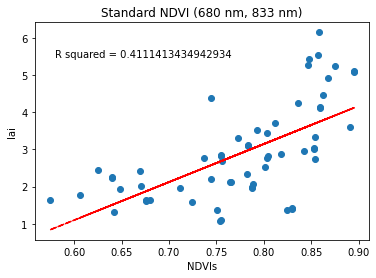

In [19]:
plt.scatter(NDVIs, lai)
plt.xlabel('NDVIs')
plt.ylabel('lai')
plt.title('Standard NDVI (680 nm, 833 nm)')

z = np.polyfit(NDVIs, lai, 1)
p = np.poly1d(z)
plt.plot(NDVIs,p(NDVIs),"r--")

plt.text(0.58, 5.5, f'R squared = {NDVIs_r2}')
plt.show()

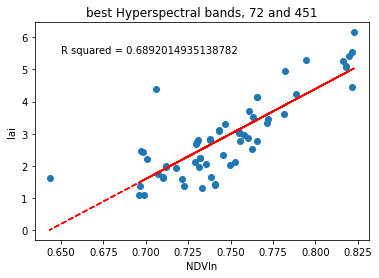

In [20]:
plt.scatter(NDVIn, lai)
plt.xlabel('NDVIn')
plt.ylabel('lai')
plt.title(f'best Hyperspectral bands, {int(top_bands.band1)} and {int(top_bands.band2)}')

z = np.polyfit(NDVIn, lai, 1)
p = np.poly1d(z)
plt.plot(NDVIn,p(NDVIn),"r--")

plt.text(0.65, 5.5, f'R squared = {NDVIn_r2}')
plt.show()

In [47]:
results = {'SVI':[NDVIs, NDVIn], 'reg':[], 'est_lai':[], 'RMSE':[]}

def est_lai(NDVI):
    return reg.intercept + (reg.slope * NDVI)

for SVI in results['SVI']:
    results['reg'].append(linregress(SVI, lai)) # calculate linear regression for standard NDVI
    results['est_lai'].append(est_lai(SVI)) # estimate lai using the regression equasion


In [48]:
results

{'SVI': [array([0.80124622, 0.81770987, 0.76473776, 0.72382544, 0.64873222,
         0.75548466, 0.89082889, 0.89531476, 0.7884871 , 0.89531476,
         0.81173747, 0.80333766, 0.77236223, 0.80382923, 0.85751949,
         0.8580105 , 0.87559191, 0.86222756, 0.80474732, 0.57425708,
         0.66968322, 0.78267067, 0.75507011, 0.76554682, 0.68010971,
         0.75507011, 0.67566579, 0.71202606, 0.62519671, 0.67566579,
         0.67060712, 0.60581282, 0.64227121, 0.64010997, 0.64010997,
         0.86753392, 0.84236327, 0.85384694, 0.85905979, 0.85905979,
         0.78285882, 0.7369968 , 0.79290395, 0.78285882, 0.84722039,
         0.84686323, 0.74473159, 0.83565894, 0.853673  , 0.78758038,
         0.85288855, 0.85288855, 0.78758038, 0.75434658, 0.82933658,
         0.74444646, 0.82933658, 0.75425191, 0.75075183, 0.82470582]),
  array([0.76244576, 0.76017196, 0.72922792, 0.72148529, 0.71753213,
         0.72971254, 0.78177368, 0.8181748 , 0.73535594, 0.8181748 ,
         0.76083886, 0.77

In [29]:
def RMSE(estimated, measured):
    return np.sqrt(np.mean((estimated-measured)**2))

RMSE(est_lai_standard, lai)
RMSE(est_lai_narrow, lai)

estimation of lai with standard NDVI bands: RMSE = 0.9770182931331445
estimation of lai with standard NDVI bands: RMSE = 0.7098010295974566


In [ ]:
# need to finish adding RMSE to the results dict and convert to pandas df